In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import json
from lib.ds2s_OV_x0 import ds2s_OV_x0
from lib.funcs import *

## 自明解から少しだけずらした解を作る

In [3]:
data = {}
for id, K in enumerate(range(1, 101)):
	x_init = np.array([10.0/K * i for i in range(K)], dtype=np.float64)
	x_init[0] += 0.1 * 0.1  # 0.1 * x_0
	model = ds2s_OV_x0(
		L=10.0,
		K=K,
		n_0=5,
		x_0=0.1,
		v_0=0.7,
		dt=1.0,
		dx=0.1,
		x_init=x_init,
		n_max=10010,
	)
	model.simulate()
	js = model.get_json()
	js["flow"] = {
		label: flow
			for label, flow in [(
					"{} {}".format(1000*i, 1000*i+100),
	 				model.flow(1000*i, 1000*i+100)
				) for i in range(10)]
	}
	data[id] = js

In [4]:
density = [js["density"] for js in data.values()]
flow = [js["flow"]["2000 2100"] for js in data.values()]

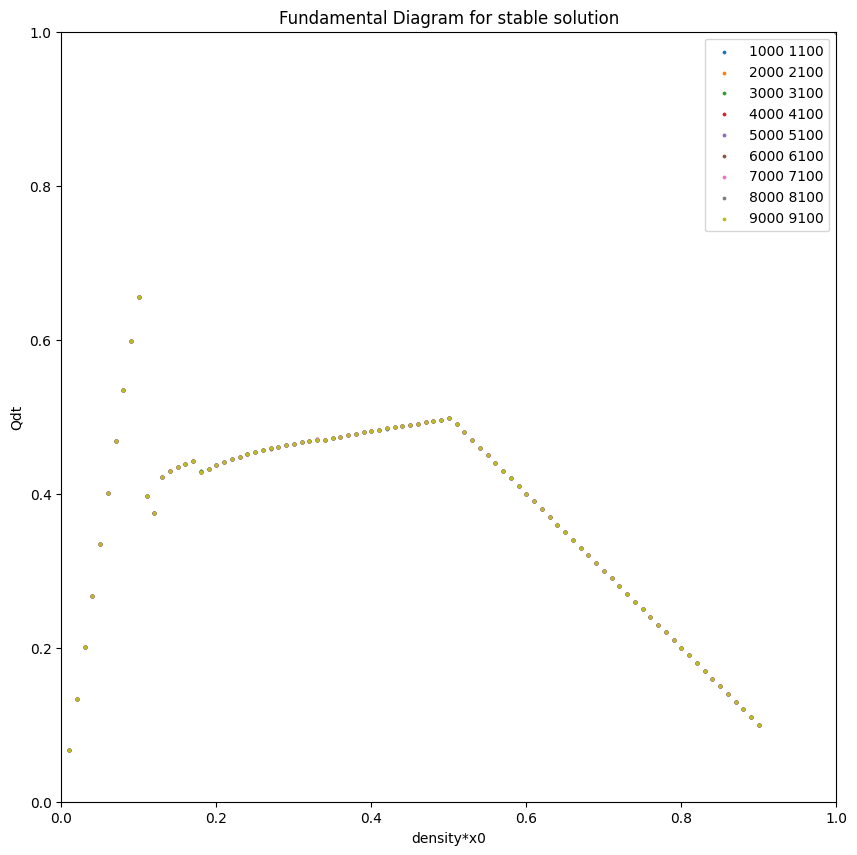

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim((0, 1.0))
ax.set_ylim((0, 1.0))
ax.set_xlabel("density*x0")
ax.set_ylabel("Qdt")
ax.set_title("Fundamental Diagram")
for i in range(1, 10):
	density = [js["density"] for js in data.values()]
	flow = [js["flow"]["{} {}".format(1000*i, 1000*i+100)] for js in data.values()]
	ax.scatter(density, flow, label="{} {}".format(1000*i, 1000*i+100), s=3)
ax.legend()
plt.show()